In [1]:
#What makes this file different than tuned 2 is that no variables were selected based on the Default results. Here, we have dropped variables based ONLY on their redundancy.  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_columns', 500)
label_encoder = LabelEncoder()


housing_numeric = pd.read_pickle("~/Documents/NYCDSA/Third Project/ML_Ames_Housing/Python/housing_numeric.pkl")
housing_factor = pd.read_pickle("~/Documents/NYCDSA/Third Project/ML_Ames_Housing/Python/housing_factor.pkl")

In [2]:
def find_redundant_features(data):
    # Calculate the matrix rank of the original dataset
    original_rank = np.linalg.matrix_rank(data)
    redundant_features = []
    for column in data.columns:
        # Create a new dataset without this column
        temp_data = data.drop(column, axis=1)
        # Calculate the rank of the new dataset
        temp_rank = np.linalg.matrix_rank(temp_data)
        # If the rank does not decrease, the removed column is redundant
        if temp_rank == original_rank:
            redundant_features.append(column)
    return redundant_features

In [3]:
redundant_features = find_redundant_features(housing_numeric)
print("Redundant features:", redundant_features)

Redundant features: ['GrLivArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']


In [4]:
housing_numeric = housing_numeric.drop(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF'], axis=1)
housing_numeric = housing_numeric.drop(['BsmtFinSF2', 'BsmtUnfSF', 'BsmtFinSF1'], axis=1)
housing_numeric['TotalBath'] = housing_numeric['BsmtFullBath'] + (housing_numeric['BsmtHalfBath']*0.5) + housing_numeric['FullBath'] + (housing_numeric['HalfBath']*0.5)
housing_factor['MixedExterior'] = housing_factor['Exterior1st'] + ' - ' + housing_factor['Exterior2nd']
housing_factor = housing_factor.drop(['Exterior1st', 'Exterior2nd'], axis=1)
housing_numeric = housing_numeric.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1)

In [5]:
redundant_features = find_redundant_features(housing_numeric)
print("Redundant features:", redundant_features)

Redundant features: []


In [6]:
housing_numeric.shape

(2580, 25)

In [7]:
np.linalg.matrix_rank(housing_numeric.values)

25

In [8]:
scaler = StandardScaler()
scaler.fit(housing_numeric)
housing_numeric_scaled = scaler.transform(housing_numeric)
housing_numeric_scaled = pd.DataFrame(housing_numeric_scaled, columns = housing_numeric.columns, index = housing_numeric.index)

In [9]:
housing_numeric_scaled = housing_numeric_scaled.drop(['SalePrice'], axis=1)
housing_numeric_scaled

,GrLivArea,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,GarageYrBlt,MoSold,YearBuilt,YearRemodAdd,TotalBath
1,-1.289598,6.869938e-16,-0.274468,-0.566310,-0.431859,-1.033650,-0.199051,-1.555298,0.610254,0.341856,-0.327115,-0.743408,-0.697756,-0.362184,-0.099302,2.636678,-0.054791,-0.097731,1.647483,-1.580577,-1.180008,-1.053847,-1.647539,-0.258698
2,-0.894555,-1.281863e+00,-0.724294,0.283369,0.029430,-1.033650,-0.199051,-0.903785,-0.931817,-1.012439,-0.968399,-0.743408,0.892001,-0.362184,-0.099302,-0.285149,-0.054791,-0.097731,0.885334,0.292044,-1.554522,0.460593,0.012109,0.996049
3,-0.992804,-4.116906e-01,-0.499689,-0.566310,-0.477270,-1.033650,-0.199051,-0.903785,-0.931817,-1.012439,-1.209484,0.450140,-0.697756,0.293089,3.301382,-0.285149,-0.054791,-0.097731,-0.638965,-1.955101,1.816101,-1.356735,1.134812,-1.513445
4,-0.915024,5.551672e-01,-0.242962,-0.566310,-1.509792,-1.033650,-0.199051,-0.252272,-0.931817,-1.012439,-0.896074,-0.743408,-0.697756,2.258909,-0.099302,1.668603,-0.054791,-0.097731,0.885334,-1.538963,-0.430981,-2.366362,0.939559,-1.513445
5,0.366305,7.173829e-02,-0.211702,-0.566310,-0.541803,0.181855,-0.199051,-0.252272,-0.931817,0.341856,0.294882,-0.743408,-0.016432,-0.362184,-0.099302,-0.285149,-0.054791,-0.097731,0.885334,0.999478,1.816101,1.032715,0.841933,1.623423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,-1.093100,6.869938e-16,-0.155827,-0.566310,-0.202409,-1.033650,-0.199051,-1.555298,0.610254,-1.012439,-1.325204,-0.743408,0.786017,-0.362184,-0.099302,0.418906,-0.054791,-0.097731,0.885334,-2.537694,-0.430981,-1.827894,-1.647539,-1.513445
760,0.505490,6.869938e-16,0.438115,-0.566310,-2.477781,1.397359,-0.199051,1.050754,0.610254,0.341856,-0.071566,-0.743408,-0.697756,-0.362184,-0.099302,-0.285149,-0.054791,-0.097731,0.885334,-0.914756,-0.056467,-0.515379,-1.403473,-0.258698
761,1.056093,6.518530e-01,-0.473844,-0.566310,-0.085295,1.397359,4.738949,1.050754,-0.931817,1.696151,1.948719,-0.743408,-0.697756,-0.362184,-0.099302,-0.285149,-0.054791,-0.097731,-0.638965,-1.164439,0.692560,-0.717305,-1.647539,-0.258698
762,0.728597,6.869938e-16,-0.159273,0.254857,-0.123536,0.181855,-0.199051,0.399241,0.610254,0.341856,0.092371,0.752402,0.755736,-0.362184,-0.099302,-0.285149,-0.054791,-0.097731,-0.638965,0.957864,0.318046,0.999061,0.793120,1.623423


In [10]:
housing_combined_scaled = pd.concat([housing_numeric_scaled,housing_factor],axis=1)
housing_combined_scaled  = housing_combined_scaled.drop(['PID'], axis=1)

In [11]:
categorical_columns = housing_combined_scaled.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = encoder.fit_transform(housing_combined_scaled[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([housing_combined_scaled.reset_index(drop=True), one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)
df_encoded

,GrLivArea,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,GarageYrBlt,MoSold,YearBuilt,YearRemodAdd,TotalBath,CentralAir,PavedDrive,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_NoVeneer,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Electrical_nan,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PoolQC_Fa,PoolQC_Gd,PoolQC_NoPool,PoolQC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,MiscFeature_NoFeature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MixedExterior_

In [12]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso 

SalePrice = housing_numeric['SalePrice']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lasso = Lasso(alpha=1, max_iter = 20000)
lasso.fit(df_encoded, SalePrice)
lasso.score(df_encoded, SalePrice)

0.9396879351787789

In [13]:
cross_val_score_lasso = cross_val_score(lasso, df_encoded, SalePrice, cv=kf)
print(cross_val_score_lasso)
print('Avg Score:',np.mean(cross_val_score_lasso))
print('Variance:',np.var(cross_val_score_lasso))

[0.90878353 0.85302728 0.92736257 0.91793368 0.88692448]
Avg Score: 0.8988063081029868
Variance: 0.0007035516890440061


In [182]:
fold_num=1
scores_list = []
coefficients_list = []
cv_scores = []
coefficients = []
for train_index, test_index in kf.split(df_encoded):
    X_train, X_test = df_encoded.iloc[train_index], df_encoded.iloc[test_index]
    y_train, y_test = SalePrice.iloc[train_index], SalePrice.iloc[test_index]
    lasso.fit(X_train, y_train)
    score = lasso.score(X_test, y_test)
    print(f'Fold {fold_num} score:', score)
    coefficients_list.append({
        'coef': lasso.coef_,
    })
    coefficients.append(lasso.coef_)
    cv_scores.append(score)
    fold_num += 1

coefficients_list

Fold 1 score: 0.8747982107637974
Fold 2 score: 0.8188557538444531
Fold 3 score: 0.8895978950273793
Fold 4 score: 0.881481102317665
Fold 5 score: 0.8297429993047991


[{'coef': array([ 4.48722513e+04,  3.43106259e+03,  5.09425384e+03,  9.60385494e+03,
          1.54998116e+04, -9.31095703e+03, -1.02382008e+04, -1.43234256e+03,
          6.79230130e+03,  6.95051646e+03, -1.69580642e+02, -2.46975819e+02,
         -1.22842239e+03, -1.28167370e+02, -7.20277465e+01,  2.95436359e+03,
         -1.96244780e+03,  5.88816927e+02, -1.26457265e+02,  9.69438117e+03,
         -2.05515483e+01,  7.64950309e+03,  1.83006982e+03, -1.18525971e+03,
         -5.38531530e+03, -1.42314178e+03, -1.82998019e+04, -6.60405790e+03,
         -1.85517932e+03,  2.87610263e+02,  4.90674484e+03,  8.63559798e+03,
          3.68071104e+03,  1.23289405e+04, -6.53254095e+02, -3.75986210e+03,
          4.75713163e+03, -7.66959193e+03,  5.10330693e+02,  4.40743622e+03,
          3.21902449e+03, -1.11584408e+04,  9.34280500e+03,  4.16897044e+04,
          2.02445743e+03,  3.45381572e+03, -1.12035112e+03,  8.10999169e+03,
          5.20091043e+02,  1.51296453e+03, -5.25940197e+02, -1.02097

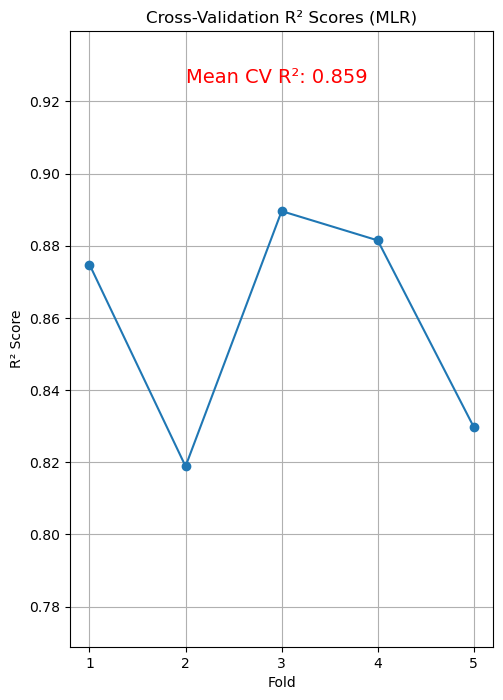

In [183]:
# Plotting the CV scores
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-')  # Adjusted x-axis to start from 1
plt.title('Cross-Validation R² Scores (MLR)')
plt.xlabel('Fold')
plt.xticks(range(1, 6))  # Set x-ticks to match fold numbers
plt.ylabel('R² Score')
plt.ylim(min(cv_scores) - 0.05, max(cv_scores) + 0.05)  # Dynamically adjust y-axis limits
plt.grid(True)
# Annotate mean R² score
mean_r2 = np.mean(cv_scores)
plt.annotate(f'Mean CV R²: {mean_r2:.3f}', xy=(2, .925), color='red', fontsize=14),
plt.show()

In [184]:
lasso.intercept_ 

180385.63917120706

In [185]:
lasso.feature_names_in_

array(['GrLivArea', 'LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'GarageYrBlt', 'MoSold', 'YearBuilt', 'YearRemodAdd',
       'TotalBath', 'CentralAir', 'PavedDrive', 'MSSubClass_150',
       'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
       'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_I (all)',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
       'Alley_NoAlley', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_NoSewr', 'LotC

In [186]:
pd.set_option('display.max_rows', 500)
coef_series = pd.Series(
  data=lasso.coef_,
  index=lasso.feature_names_in_
)

coef_series.sort_values(ascending = False)

Neighborhood_GrnHill               107512.769190
RoofMatl_Membran                    87194.050047
KitchenQual_Po                      83088.631663
MixedExterior_CemntBd - Wd Shng     75823.323844
Condition2_PosA                     65595.711982
MixedExterior_Wd Sdng - AsbShng     51048.810702
RoofMatl_Metal                      50198.756325
MiscFeature_Othr                    47408.084072
GrLivArea                           46160.636544
MixedExterior_VinylSd - Stucco      41009.913959
OverallQual_10                      40245.639072
SaleType_Con                        37393.765623
PoolQC_Fa                           35587.336278
Neighborhood_StoneBr                35504.181008
RoofMatl_WdShngl                    33185.654678
MixedExterior_Plywood - CBlock      28307.395815
MixedExterior_HdBoard - AsphShn     28306.268369
Neighborhood_Greens                 26723.533402
MixedExterior_MetalSd - Stucco      25516.590161
OverallQual_9                       25398.696494
MixedExterior_WdShin

In [63]:
lasso = Lasso(alpha=[1, 0.5, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025, 0.001, 0.0005, 0.00025, 0.0001], max_iter= 20000, random_state = 42)
fold_num=1
best_params_list = []
best_scores_list = []
coefficients_list = []
param_grid = {
    'alpha': np.linspace(0.0001,400, 200)
}
grid_search = GridSearchCV(lasso, param_grid, cv=kf, scoring='r2', n_jobs = -1,  return_train_score=True)
grid_search.fit(df_encoded, SalePrice)
print('Best Estimator: ',grid_search.best_estimator_)
print('Best Params: ',grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)
# Store best parameters and score
best_params_list.append({
    'params':grid_search.best_params_,
    # 'fold': fold_num,
    })
best_score = grid_search.best_score_
best_scores_list.append({
    'score':best_score,
    # 'fold':fold_num
    })
# Store coefficients of the best model
best_model = grid_search.best_estimator_
coefficients_list.append({
    'coef': best_model.coef_,
    # 'fold':fold_num
    })
print('Best Params List:', best_params_list)
print('Best Scores List:',best_scores_list)

Best Estimator:  Lasso(alpha=34.17094572864322, max_iter=20000, random_state=42)
Best Params:  {'alpha': 34.17094572864322}
Best Score:  0.90687537368073
Best Params List: [{'params': {'alpha': 34.17094572864322}}]
Best Scores List: [{'score': 0.90687537368073}]


In [26]:
grid_cv_score_lasso = cross_val_score(Lasso(alpha= 34.17094572864322), df_encoded,SalePrice, cv=kf)
grid_cv_mean_score_lasso = np.mean(grid_cv_score_lasso)
print('Each Fold Score:', grid_cv_mean_score_lasso)
print('Mean model score:', grid_cv_mean_score_lasso)
print('Score Variance:', np.var(grid_cv_mean_score_lasso))

Each Fold Score: 0.90687537368073
Mean model score: 0.90687537368073
Score Variance: 0.0


In [28]:
for el in coefficients_list:
    feature_name_and_coef = list(zip(list(df_encoded.columns), el['coef']))
    for feature, coef in feature_name_and_coef:
        print(f"{feature}: {coef}")
    print('-' * 40)

GrLivArea: 25616.525086607802
LotFrontage: 254.8646899344476
LotArea: 3457.906605904211
MasVnrArea: 4176.1082474803725
TotalBsmtSF: 9639.177535105584
BedroomAbvGr: -3907.6730424933453
KitchenAbvGr: -3176.7588924919746
TotRmsAbvGrd: 950.1788323162882
Fireplaces: 6628.177579719915
GarageCars: 2162.432158336569
GarageArea: 2945.0115724702105
WoodDeckSF: 1006.2044932815104
OpenPorchSF: -393.11599751724395
EnclosedPorch: 1120.1438401322532
3SsnPorch: 490.16359201906045
ScreenPorch: 2346.6230592608813
PoolArea: -876.3069875119313
MiscVal: 427.146086432692
YrSold: -355.50647544822056
GarageYrBlt: 490.2977668423741
MoSold: -763.5025317400402
YearBuilt: 10050.657115443933
YearRemodAdd: 2036.0624840400785
TotalBath: 4525.0687526105685
CentralAir: -0.0
PavedDrive: -0.0
MSSubClass_150: -0.0
MSSubClass_160: -2712.1141002249615
MSSubClass_180: -0.0
MSSubClass_190: -0.0
MSSubClass_20: 1964.8418543973703
MSSubClass_30: 0.0
MSSubClass_40: 0.0
MSSubClass_45: 0.0
MSSubClass_50: 0.0
MSSubClass_60: -0.0
MS

In [68]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1, max_iter = 20000)
ridge.fit(df_encoded, SalePrice)
ridge.score(df_encoded, SalePrice)

0.93786175293262

In [69]:
cross_val_score_Ridge = cross_val_score(ridge, df_encoded, SalePrice, cv=kf)
print(cross_val_score_Ridge)
print('Avg Score:',np.mean(cross_val_score_Ridge))
print('Variance:',np.var(cross_val_score_Ridge))

[0.91467938 0.86341456 0.92836662 0.92520222 0.90323229]
Avg Score: 0.9069790159007415
Variance: 0.0005521420409601162


In [72]:
fold_num=1
scores_list = []
coefficients_list = []
cv_scores = []
coefficients = []
for train_index, test_index in kf.split(df_encoded):
    X_train, X_test = df_encoded.iloc[train_index], df_encoded.iloc[test_index]
    y_train, y_test = SalePrice.iloc[train_index], SalePrice.iloc[test_index]
    ridge.fit(X_train, y_train)
    score = ridge.score(X_test, y_test)
    print(f'Fold {fold_num} score:', score)
    coefficients_list.append({
        'coef': ridge.coef_,
    })
    coefficients.append(ridge.coef_)
    cv_scores.append(score)
    fold_num += 1

coefficients_list

Fold 1 score: 0.914679383261785
Fold 2 score: 0.8634145624937982
Fold 3 score: 0.928366622033558
Fold 4 score: 0.9252022232043075
Fold 5 score: 0.9032322885102586


[{'coef': array([ 2.71101418e+04,  1.94304607e+02,  4.07786117e+03,  4.21924473e+03,
          8.28316086e+03, -3.17574554e+03, -2.30584280e+03,  9.75763243e+01,
          8.00657124e+03,  2.74753320e+03,  2.49543800e+03,  6.17502964e+02,
         -8.50980316e+02,  1.31287458e+03,  3.22332216e+02,  2.91672120e+03,
         -3.01797252e+03,  8.62914674e+02, -6.07124556e+02,  1.95042178e+02,
         -7.76013349e+02,  1.01208238e+04,  1.41013633e+03,  4.56524760e+03,
          2.83027614e+01, -1.69621845e+03, -1.35623743e+04, -6.45814872e+03,
         -6.59948681e+03,  6.19531064e+03,  7.30107307e+03,  9.37675715e+03,
          6.44934028e+03,  6.29139947e+03,  1.11119560e+04,  2.23933017e+03,
          7.20455885e+03,  1.26335651e+04, -5.31741931e+03,  2.84549641e+02,
         -5.40470896e+03, -6.05915100e+03, -4.11642629e+03,  1.19234247e+03,
          3.51351435e+03,  4.97998485e+03,  4.89735615e+02,  8.26471606e+03,
          2.69718358e+02,  8.18739201e+02,  2.30406572e+03,  4.74268

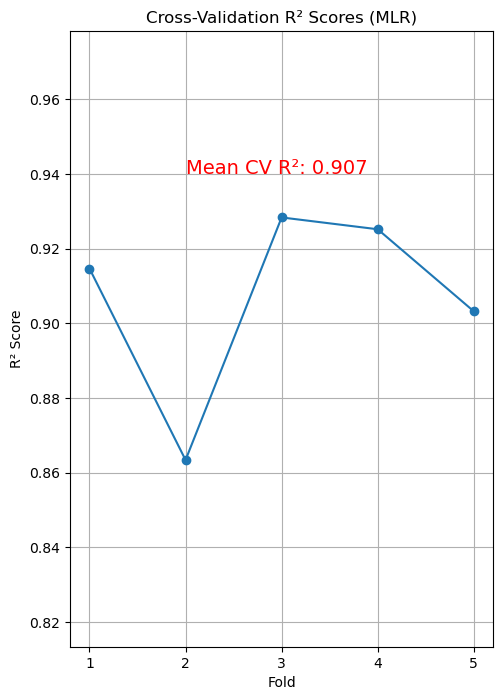

In [74]:
# Plotting the CV scores
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-')  # Adjusted x-axis to start from 1
plt.title('Cross-Validation R² Scores (MLR)')
plt.xlabel('Fold')
plt.xticks(range(1, 6))  # Set x-ticks to match fold numbers
plt.ylabel('R² Score')
plt.ylim(min(cv_scores) - 0.05, max(cv_scores) + 0.05)  # Dynamically adjust y-axis limits
plt.grid(True)
# Annotate mean R² score
mean_r2 = np.mean(cv_scores)
plt.annotate(f'Mean CV R²: {mean_r2:.3f}', xy=(2, .94), color='red', fontsize=14),
plt.show()

In [90]:
ridge = Ridge(alpha=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], max_iter= 20000, random_state = 42)
fold_num=1
best_params_list = []
best_scores_list = []
coefficients_list = []
param_grid = {
    'alpha': np.linspace(4,400, 200)
}
grid_search = GridSearchCV(ridge, param_grid, cv=kf, scoring='r2', n_jobs = -1,  return_train_score=True)
grid_search.fit(df_encoded, SalePrice)
print('Best Estimator: ',grid_search.best_estimator_)
print('Best Params: ',grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)
# Store best parameters and score
best_params_list.append({
    'params':grid_search.best_params_,
    # 'fold': fold_num,
    })
best_score = grid_search.best_score_
best_scores_list.append({
    'score':best_score,
    # 'fold':fold_num
    })
# Store coefficients of the best model
best_model = grid_search.best_estimator_
coefficients_list.append({
    'coef': best_model.coef_,
    # 'fold':fold_num
    })
print('Best Params List:', best_params_list)
print('Best Scores List:',best_scores_list)

Best Estimator:  Ridge(alpha=5.989949748743719, max_iter=20000, random_state=42)
Best Params:  {'alpha': 5.989949748743719}
Best Score:  0.9102028154683126
Best Params List: [{'params': {'alpha': 5.989949748743719}}]
Best Scores List: [{'score': 0.9102028154683126}]


In [92]:
model_cv_score = cross_val_score(Ridge(alpha= 5.989949748743719), df_encoded,SalePrice, cv=kf)
mean_model_score = np.mean(model_cv_score)
print('Each Fold Score:', model_cv_score)
print('Mean model score:', mean_model_score)
print('Score Variance:', np.var(model_cv_score))

Each Fold Score: [0.91394788 0.8697623  0.92747915 0.92776386 0.91206089]
Mean model score: 0.9102028154683126
Score Variance: 0.00045195503551390213
